In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [3]:
#Carga de dataset
data = pd.read_csv('Bank_registries.csv', header=0, sep=',')

In [4]:
#mostramos el dataset
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [5]:
# observamos si nos faltan datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Eliminar columnas irrelevantes para la regresion
columna_eliminar = ['RowNumber', 'CustomerId', 'Surname']
data.drop(columna_eliminar, axis=1, inplace=True)

# Muestra el DataFrame resultante
print(data)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [9]:
#procesamiento de frases
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [10]:
X = data.iloc[:, :10]
y = data.iloc[:, 10]
m = y.size

In [11]:
print(X)
print('*'*25)
print(y)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [12]:
# Division de dataset en entrenamiento y prueba con el numero 42 para que no se cambien los valores
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [13]:
print("Datos entrenamiento> ")
print(train_data)
print("\n Datos de prueba> ")
print(test_data)

Datos entrenamiento> 
      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9254          686          0       1   32       6       0.00              2   
1561          632          1       1   42       4  119624.60              2   
1670          559          2       1   24       3  114739.92              1   
6087          561          0       0   27       9  135637.00              1   
6669          517          0       1   56       9  142147.32              1   
...           ...        ...     ...  ...     ...        ...            ...   
5734          768          0       1   54       8   69712.74              1   
5191          682          0       0   58       1       0.00              1   
5390          735          0       0   38       1       0.00              3   
860           667          0       1   43       8  190227.46              1   
7270          697          1       1   51       1  147910.30              1   

      HasCrCard  IsActiveMemb

In [14]:
#guardamos los datos de la parte de prueba en un nuevo dataset
train_data.to_csv("train.csv", index=False)

In [15]:
#guardamos los datos de la parte de testeo en un nuevo dataset
test_data.to_csv("test.csv", index=False)

In [16]:
#Carga de dataset
data = pd.read_csv('train.csv')

In [17]:
X = data.iloc[:, :10]
y = data.iloc[:, 10]
m = y.size

In [18]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [19]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             686          0       1   32       6       0.00              2   
1             632          1       1   42       4  119624.60              2   
2             559          2       1   24       3  114739.92              1   
3             561          0       0   27       9  135637.00              1   
4             517          0       1   56       9  142147.32              1   
...           ...        ...     ...  ...     ...        ...            ...   
7995          768          0       1   54       8   69712.74              1   
7996          682          0       0   58       1       0.00              1   
7997          735          0       0   38       1       0.00              3   
7998          667          0       1   43       8  190227.46              1   
7999          697          1       1   51       1  147910.30              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [20]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [21]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [22]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [23]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [24]:
#Carga de dataset
data = pd.read_csv('test.csv')
print(data)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             596          1       1   32       3   96709.07              2   
1             623          0       1   43       1       0.00              2   
2             601          2       0   44       4       0.00              2   
3             506          1       1   59       8  119152.10              2   
4             560          2       0   27       7  124995.98              1   
...           ...        ...     ...  ...     ...        ...            ...   
1995          602          1       0   53       5   98268.84              1   
1996          609          0       1   25      10       0.00              1   
1997          730          0       0   47       7       0.00              1   
1998          692          0       1   29       4       0.00              1   
1999          628          1       1   39       1  115341.19              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

theta calculado por el descenso por el gradiente: [-0.86764015 -0.03294239  0.04307095 -0.12551324  0.3472889  -0.01565112
  0.13312765 -0.03862278 -0.00445222 -0.20437914  0.01138834]
El resaultado entre falso o verdadero es (usando el descenso por el gradiente):1


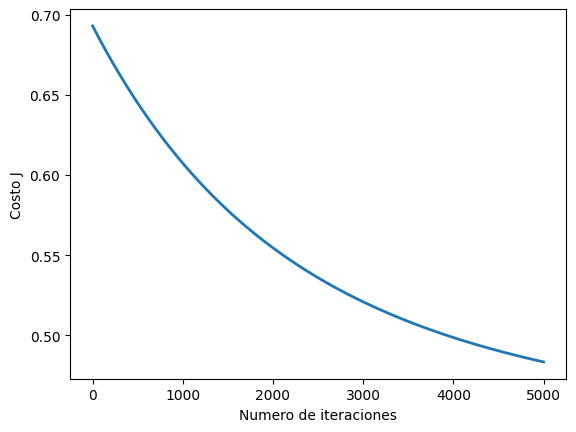

In [26]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 506, 1, 1, 59, 2, 8, 2, 1, 1, 170679.74]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('El resaultado entre falso o verdadero es (usando el descenso por el gradiente):{:.0f}'.format(aprueba))